In [ ]:
import pandas as pd
import scipy
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_excel('FinalCovid.xlsx')

In [ ]:
import numpy as np
from sklearn.linear_model import LinearRegression, LogisticRegression

In [ ]:
y = df["Tổng"]

In [ ]:
print(len(y))

643


In [ ]:
Y_train = [y[0]]

In [ ]:
for i in range(len(y) - 1):
  Y_train.append(y[i + 1] - y[i])

In [ ]:
Y_train[:10]

[18401, 1, 1548, 15, 1606, 1, 5, 1614, 0, 4070]

In [ ]:
count = [y_test for y_test in Y_train if y_test < 0]
len(count)

2

In [ ]:
count = [test for test in y if test < 0]

In [ ]:
len(count)

0

In [ ]:
x = np.array(range(1, len(y)+1, 1))

In [ ]:
X_train = [[a] for a in x]

In [ ]:
print(X_train)

[[1], [2], [3], [4], [5], [6], [7], [8], [9], [10], [11], [12], [13], [14], [15], [16], [17], [18], [19], [20], [21], [22], [23], [24], [25], [26], [27], [28], [29], [30], [31], [32], [33], [34], [35], [36], [37], [38], [39], [40], [41], [42], [43], [44], [45], [46], [47], [48], [49], [50], [51], [52], [53], [54], [55], [56], [57], [58], [59], [60], [61], [62], [63], [64], [65], [66], [67], [68], [69], [70], [71], [72], [73], [74], [75], [76], [77], [78], [79], [80], [81], [82], [83], [84], [85], [86], [87], [88], [89], [90], [91], [92], [93], [94], [95], [96], [97], [98], [99], [100], [101], [102], [103], [104], [105], [106], [107], [108], [109], [110], [111], [112], [113], [114], [115], [116], [117], [118], [119], [120], [121], [122], [123], [124], [125], [126], [127], [128], [129], [130], [131], [132], [133], [134], [135], [136], [137], [138], [139], [140], [141], [142], [143], [144], [145], [146], [147], [148], [149], [150], [151], [152], [153], [154], [155], [156], [157], [158], [

In [ ]:
X_train = x

In [ ]:
reg = LogisticRegression().fit(X_train, y)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [ ]:
test = scipy.stats.linregress(X_train, y)

ValueError: ignored

In [ ]:
y

0        18401
1        18402
2        19950
3        19965
4        21571
        ...   
195    1989522
196    2005900
197    2021384
198    2043128
199    2043128
Name: Tổng, Length: 200, dtype: int64

In [ ]:
reg.score(X_train, y)

0.02

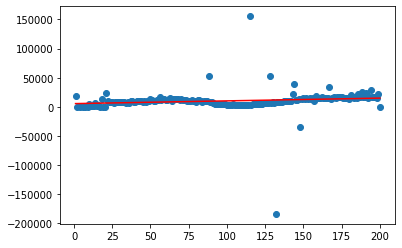

In [ ]:
plt.plot(X_train, Y_train, 'o', label='original data')
plt.plot(X_train, test.intercept + test.slope*X_train, 'r', label='fitted line')

In [ ]:
reg.predict([[700]])

array([2043128])

In [ ]:
X_train[-15:]

[[629],
 [630],
 [631],
 [632],
 [633],
 [634],
 [635],
 [636],
 [637],
 [638],
 [639],
 [640],
 [641],
 [642],
 [643]]

In [ ]:
X_train15 = X_train[:-15]
Y_train15 = y[:-15]
X_test = X_train[-15:]
Y_test = y[-15:]

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
 
poly = PolynomialFeatures(degree = 4)
X_poly = poly.fit_transform(X_train15)
 
poly.fit(X_poly, Y_train15)
lin2 = LinearRegression()
lin2.fit(X_poly, Y_train15)

LinearRegression()

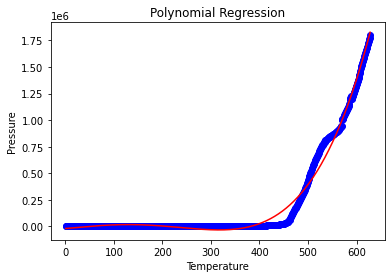

In [ ]:
# Visualising the Polynomial Regression results
plt.scatter(X_train15, Y_train15, color = 'blue')

plt.plot(X_train15, lin2.predict(poly.fit_transform(X_train15)), color = 'red')
plt.title('Polynomial Regression')
plt.xlabel('Temperature')
plt.ylabel('Pressure')

plt.show()


In [ ]:
X_test[0]

[629]

In [ ]:
casePredict = [lin2.predict(poly.fit_transform([test])) for test in X_test]

In [ ]:
Y_test

628    1815925
629    1841769
630    1857879
631    1874432
632    1897613
633    1912431
634    1928466
635    1956757
636    1973482
637    1989522
638    2005900
639    2021384
640    2043128
641    2059966
642    2059966
Name: Tổng, dtype: int64

In [ ]:
casePredict

[array([1844633.64041974]),
 array([1862187.02863728]),
 array([1879857.41839752]),
 array([1897645.30045904]),
 array([1915551.16655946]),
 array([1933575.5094154]),
 array([1951718.8227225]),
 array([1969981.60115538]),
 array([1988364.34036771]),
 array([2006867.53699215]),
 array([2025491.68864037]),
 array([2044237.29390306]),
 array([2063104.8523499]),
 array([2082094.86452961]),
 array([2101207.83196989])]

In [ ]:
lin2.coef_

array([ 0.00000000e+00,  3.95016519e+02,  1.20828024e+00, -2.10845842e-02,
        4.07921032e-05])